In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Iteração do ponto fixo

Calcula o ponto f(x) = x

In [2]:
def ponto_fixo(g, x0, max_iter=200, tol=1e-5):
    '''iteracao do ponto fixo
        g: funcao transformada g
        x0: aproximacao inicial
        max_iter: limite de iteracoes
        tol: tolerancia de erro, padrao 0.001% (.00001)
        
        retorna tuple (convergencia x, erro final, numero de iteracoes)
    '''
    erro = 0
    xa = x0
    for i in range(max_iter):
        x1 = g(x0)    
        x0 = x1      
        erro = abs((x1 - xa) / x1)
        
        if erro <= tol:
            return x1, erro, i+1
        
        xa = x0
        
    return x1, erro, max_iter

In [3]:
def res(tup):
    # imprime o resultado dos metodos de forma mais descritiva
    print('convergencia em x = {}\ncom erro de {}\n{} iteracoes'.format(tup[0], tup[1], tup[2]))

### $g(x) = e^{-x}$

In [4]:
g = lambda x: np.e**-x

In [5]:
res(ponto_fixo(g, 0))

convergencia em x = 0.5671447133465701
com erro de 6.93277778962193e-06
23 iteracoes


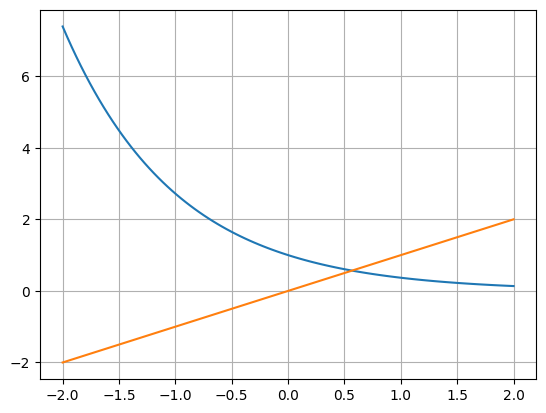

In [6]:
x = np.linspace(-2, 2, 100)
plt.plot(x, g(x))
plt.plot(x, x)
plt.grid()

# Newton-Raphson

Converge na raiz a partir de uma aprorximação inicial e a derivada da função

In [7]:
def newton(f, d, x0, max_iter=200, tol=1e-10):
    erro = 0
    xa = x0
    for i in range(max_iter):
        x1 = x0 - f(x0) / d(x0)
        x0 = x1
        erro = abs((x1 - xa) / x1)
        
        if erro <= tol:
            return x1, erro, i+1
        
        xa = x0
        
    return x1, erro, max_iter

# Método da secante

Converge na raiz a partir das raizes de secantes de f(x) e dois numeros iniciais

In [8]:
def secante(f, x0, x1, max_iter=200, tol=1e-10):
    erro = 0
    xa = x1
    for i in range(max_iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x2
        erro = abs((x1 - xa) / x1)
        
        if erro <= tol:
            return x2, erro, i+1
        
        xa = x1
        
    return x2, erro, max_iter

## 2. Ponto fixo de $2sin(\sqrt{x})-x$

critério de parada: erro <= 0.001% (padrão)

In [9]:
f = lambda x: 2*np.sin(np.sqrt(x))-x

In [10]:
res(ponto_fixo(f, 0.5))

convergencia em x = 0.7686497675264468
com erro de 5.567119495536234e-06
9 iteracoes


## 3. Aproximando da maior raiz real

## $f(x)=2x^3-11.7x^2+17.7x-5$

In [11]:
from decimal import Decimal

In [12]:
f = lambda x: 2*x**3 - 11.7*x**2 + 17.7*x - 5
d = lambda x: 6*x**2 - 23.4*x + 17.7

### a) graficamente

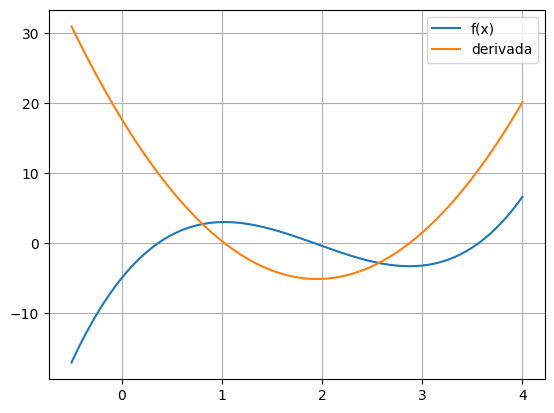

In [13]:
x = np.linspace(-.5, 4, 100)
plt.plot(x, f(x), label='f(x)')
plt.plot(x, d(x), label='derivada')
plt.legend()
plt.grid()

### b) ponto fixo

transformação de f(x) para encontrar a raiz: $g(x) =  5 / (2x^2 - 11.7x + 17.7)$

In [14]:
g = lambda x: 5 / (2*x**2 - 11.7*x + 17.7)

In [15]:
res(ponto_fixo(g, 3, max_iter=3))

convergencia em x = 0.2989664134622428
com erro de 0.7169639339482556
3 iteracoes


sempre converge na primeira raiz, independente da aproximação inicial que eu escolha. Valor real = 0.365

### c) Newton-Raphson

In [16]:
res(newton(f, d, 3, 3))

convergencia em x = 3.7929344806432264
com erro de 0.12571152449993078
3 iteracoes


### d) Secante

In [17]:
res(secante(f, 3, 4, max_iter=3))

convergencia em x = 3.586275384711736
com erro de 0.029279032988293666
3 iteracoes


In [45]:
def bissecao(f, a, b, tol=1e-10, lim_iter=200):
    erro = 1
    xa = a
    for i in range(lim_iter):
        x = (a+b)/2
            
        if erro <= tol:
            return x, erro, i+1

        else:
            if np.sign(f(a)) * np.sign(f(x)) == -1:
                b = x 
            else:
                a = x
                
        try:
            erro = abs((x - xa)/x)
        except ZeroDivisionError:
            erro = 1
        xa = x
    
    return x, erro, lim_iter

In [19]:
def falsa_pos(f, a, b, tol=1e-10, lim_iter=200):

    if np.sign(f(b)) * np.sign(f(a)) != -1:
            raise ValueError('intervalo deve ter sinais opostos')

    else:
        erro = 1
        xa = a
        for i in range(lim_iter):
            x = (a * f(b) - b * f(a)) / (f(b) - f(a))
            
            if erro <= tol:
                return x, erro, i+1

            if f(a) * f(x) < 0:
                b = x
            else:
                a = x
            
            erro = abs((x - xa)/x)
                
            xa=x

    return x, erro, lim_iter

## 4. Comparação entre os métodos

## a) $f(x) = 2x^4 + 4x^3 + 3x^2 - 10x - 15$

In [20]:
f = lambda x: 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15

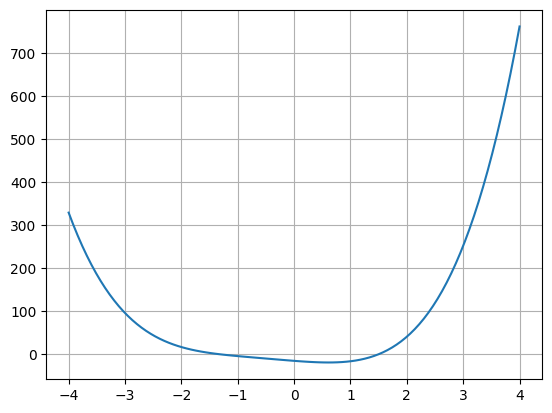

In [21]:
x = np.linspace(-4, 4, 100)
plt.plot(x, f(x))
plt.grid()

### Bissecao

In [22]:
res(bissecao(f, 0, 3))

convergencia em x = 1.492878708653734
com erro de 5.848532159152509e-11
36 iteracoes


In [23]:
%timeit bissecao(f, 0, 3)

221 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Falsa posicao

In [24]:
res(falsa_pos(f, 0, 3))

convergencia em x = 1.4928787084871324
com erro de 7.834557534606973e-11
65 iteracoes


In [25]:
%timeit falsa_pos(f, 0, 3)

314 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


$f'(x) = 8x^3 + 12x^2 + 6x - 10$

In [26]:
d = lambda x: 8*x**3  + 12*x**2 + 6*x - 10

### Newton-Raphson

In [27]:
res(newton(f, d, 3))

convergencia em x = 1.4928787086636037
com erro de 1.3495846112721618e-11
7 iteracoes


In [28]:
%timeit nr = newton(f, d, 3)

9.69 µs ± 180 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Secante

In [29]:
res(secante(f, 0, 3))

convergencia em x = -1.3003841326439198
com erro de 7.781218174248835e-13
11 iteracoes


converge em outra raiz das demais

In [30]:
%timeit secante(f, 0, 3)

26.7 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## b) $f(x) = (x+3)(x+1)(x-2)^3$

In [31]:
f = lambda x: (x+3)*(x+1)*(x-2)**3

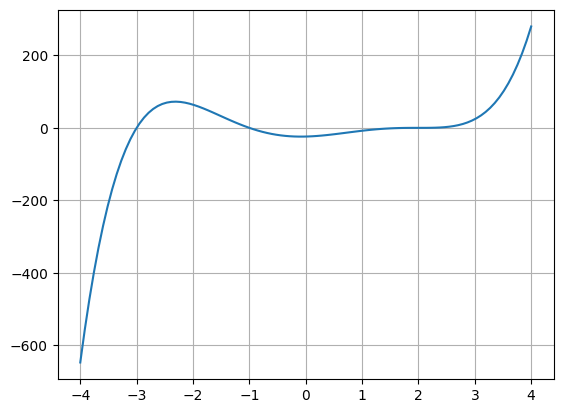

In [32]:
plt.plot(x, f(x))
plt.grid()

In [33]:
d = lambda x: (x - 2)**2 * (5*x**2 + 12*x + 1)

### Bissecao

In [34]:
res(bissecao(f, 0, 5))

convergencia em x = 2.0000000000436557
com erro de 7.275957614289305e-11
36 iteracoes


### Falsa posicao

In [35]:
res(falsa_pos(f, 0, 5))

convergencia em x = 1.714409136227648
com erro de 0.000444126334691446
200 iteracoes


### Newton-Raphson

In [36]:
res(newton(f, d, 0))

convergencia em x = 2.00000000031569
com erro de 7.892264618367588e-11
60 iteracoes


### Secante

In [37]:
res(secante(f, 0, 5))

convergencia em x = 2.0000000005693157
com erro de 9.243339424569492e-11
75 iteracoes


## c) $f(x) = 5x^3 + x^2 − e^{1−2x} + cos(x) + 20$

In [38]:
f = lambda x: 5*x**3 + x**2 - np.e**(1-2*x) + np.cos(x) + 20

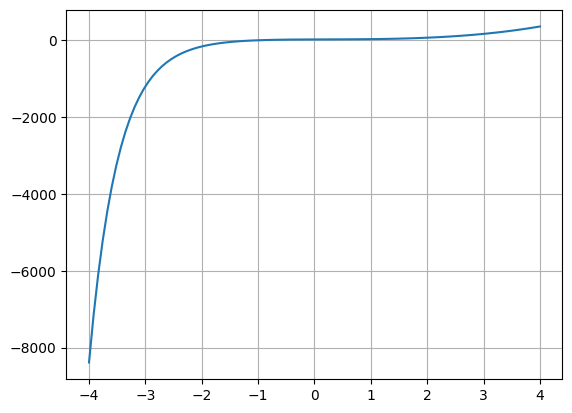

In [41]:
plt.plot(x, f(x))
plt.grid()

In [46]:
res(bissecao(f, -5, 5))

convergencia em x = -0.9295604598082718
com erro de 7.827309710870648e-11
38 iteracoes


In [47]:
res(falsa_pos(f, -5, 5))

convergencia em x = 1.5687692610780049
com erro de 0.0028971429408421105
200 iteracoes
